In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive, files
import os

drive.mount('/content/gdrive')

proj_path ='/content/gdrive/MyDrive/project-recommendations/Results' 

#os.listdir(proj_path)
os.chdir(proj_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
df_list

[Empty DataFrame
 Columns: [Unnamed: 0]
 Index: []]

AttributeError: ignored

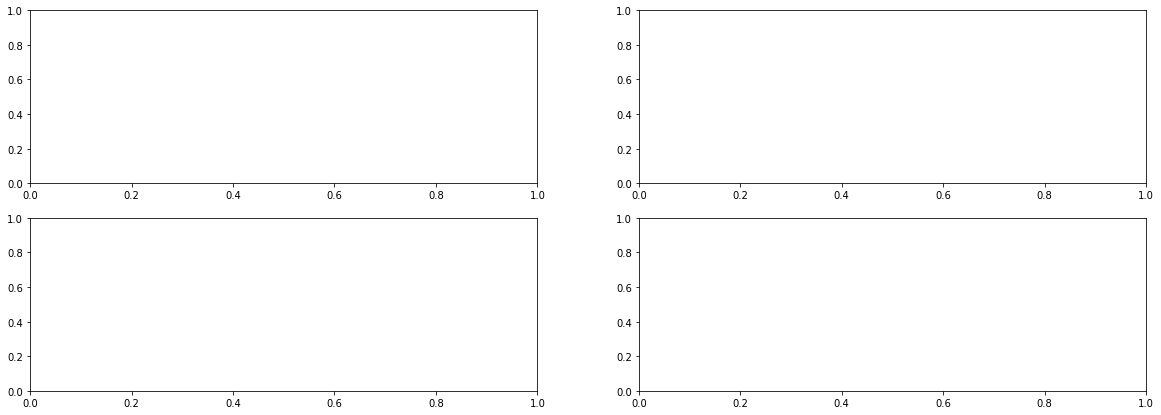

In [12]:
df_list = []
file_names = os.listdir()
for file in file_names:
  df_list.append(pd.read_csv(file))

## Plot each algorithm metrics
for j, df in enumerate(df_list):
  fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,7))
  #ax[0].set_title("Hit Rate Click")
  #ax[1].set_title("Normalized Discounted Cumulative Gain Click")
  #ax[2].set_title("Hit Rate Purchase")
  #ax[3].set_title("Normalized Discounted Cumulative Gain Purchase")
  X = [x * 4000 for x in df.index]
  cols = df.columns
  for i, metric in enumerate(['hr', 'ndcg']):
    local_cols = cols[metric in cols]

    for k, typ in enumerate(['click', 'purchase']):
      local_local_cols = local_cols[typ in local_cols]
      for col in local_local_cols:
        ax[k * 2 + i].plot(x, df[col], label=col) 

  #ax[0].legend()
  #ax[1].legend()
  #ax[2].legend()
  #ax[3].legend()
  fig.savefig(file_names.split('.')[0] + 'results.png')

  #print results
  print("### new iteration ###")
  print(file_names[j])
  print(df.loc[-1,:])
  print("### end iteration ###")



  


In [ ]:
_